In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom, poisson, zipf
from ipywidgets import interact, interact_manual, widgets

plt.style.use('seaborn-v0_8')
rng = np.random.default_rng()

# Bernoulli-Verteilung

Eine Zufallsvariable $X$ heißt **Bernoulli-verteilt** falls $X(\Omega)=\{0,1\}$ und ihre Wahrscheinlichkeitsfunktion ist $$p_X(1)=p,\quad p_X(0)=1-p$$ mit $p\in[0,1]$.

In [4]:
def flip_coin(n, p):
    X = rng.binomial(n=1, p=p, size=n)
    fig, ax = plt.subplots()
    ax.hist(X, align='mid', bins=[-0.5, 0.5, 1.5], density=True, color='green')
    ax.set_xticks([0,1])
    plt.show()

In [5]:
%matplotlib widget
interact_manual(flip_coin, n = widgets.IntSlider(min=1, max=100_000, step=1), p = widgets.FloatSlider(min=0, max=1, value=0.5));

interactive(children=(IntSlider(value=1, description='n', min=1), FloatSlider(value=0.5, description='p', max=…

# Binomialverteilung

Eine Zufallsvariable $X$ heißt **Binomialverteilt** mit parametern $n\in\mathbb{N},p\in[0,1]$ falls $X(\Omega)=\{0,\dotsc,n\}$ und ihre Wahrscheilichkeitsfunction ist $$p_X(k)=\binom{n}{k}p^k(1-p)^{n-k},\quad k\in\{0,\dotsc, n\}.$$

In [6]:
def flip_coins(n, p, N):
    X = binom.rvs(n=n, p=p, size=N, random_state=rng)
    x = np.arange(0, n+1)
    fig, ax = plt.subplots()
    ax.step(x, binom.pmf(x, n, p), where='mid')
    ax.hist(X, align='mid', bins=x-0.5, density=True)
    ax.set_xticks(x)
    plt.show()

In [7]:
interact_manual(flip_coins, n=widgets.IntSlider(min=10,max=20), p=widgets.FloatSlider(min=0,max=1,value=0.5), N=widgets.IntSlider(min=1, max=1000,value=10));

interactive(children=(IntSlider(value=10, description='n', max=20, min=10), FloatSlider(value=0.5, description…

# Geometrische Verteilung

Eine Zufallsvariable $X$ heißt **geometrisch verteilt** mit parameter $p\in[0,1]$ falls $X(\Omega)=\mathbb{N}$ und ihre Wahrscheinlichkeitsfunction ist $$p_X(k)=p(1-p)^{k-1},\quad k\in\mathbb{N}.$$

In [6]:
def sample_geom(p, N):
    X = geom.rvs(p, size=N, random_state=rng)
    fig, ax = plt.subplots()
    x = np.arange(1, 11)
    fig, ax = plt.subplots()
    ax.step(x, geom.pmf(x, p), where='mid')
    ax.hist(X, align='mid', bins=x-0.5, density=True)
    ax.set_xticks(x)
    plt.show()

In [7]:
interact_manual(sample_geom, p=widgets.FloatSlider(min=0,max=1,value=0.5), N=widgets.IntSlider(min=1, max=1000,value=10));

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), IntSlider(value=10, description='N', m…

# Poisson-Verteilung

Eine Zufallsvariable $X$ heißt **Poisson-verteilt** mit parameter $\lambda>0$ falls $X(\Omega)=\mathbb{N}_0$ und ihre Wahrscheinlichkeitsfunction ist $$p_X(k)=\frac{\lambda^{-k}}{k!}e^{-\lambda},\quad k\in\mathbb{N}_0.$$

In [8]:
def sample_poisson(λ, N):
    X = poisson.rvs(λ, size=N, random_state=rng)
    fig, ax = plt.subplots()
    x = np.arange(0, 16)
    fig, ax = plt.subplots()
    ax.step(x, poisson.pmf(x, λ), where='mid')
    ax.hist(X, align='mid', bins=x-0.5, density=True)
    ax.set_xticks(x)
    plt.show()

In [9]:
interact_manual(sample_poisson, λ=widgets.FloatSlider(min=0,max=10,value=1.0), N=widgets.IntSlider(min=1, max=10_000,value=10));

interactive(children=(FloatSlider(value=1.0, description='λ', max=10.0), IntSlider(value=10, description='N', …

## Poison-Grenzwertsatz

Sei $n\in\mathbb{N}$ und $(p_n)$ eine Folge von Wahrscheinlichkeiten mit $n p_n\to \lambda\in(0,\infty)$.

Sei $X_n$ eine Folge von binomialverteilten Zufallsvariable und sei $X$ Poisson-verteilt. Dann gilt
$$\lim_{n\to\infty} p_{X_n}(k) = p_X(k)$$ für alle $k\in\mathbb{N}_0$.

interactive(children=(IntSlider(value=0, description='i', max=94), Output()), _dom_classes=('widget-interact',…

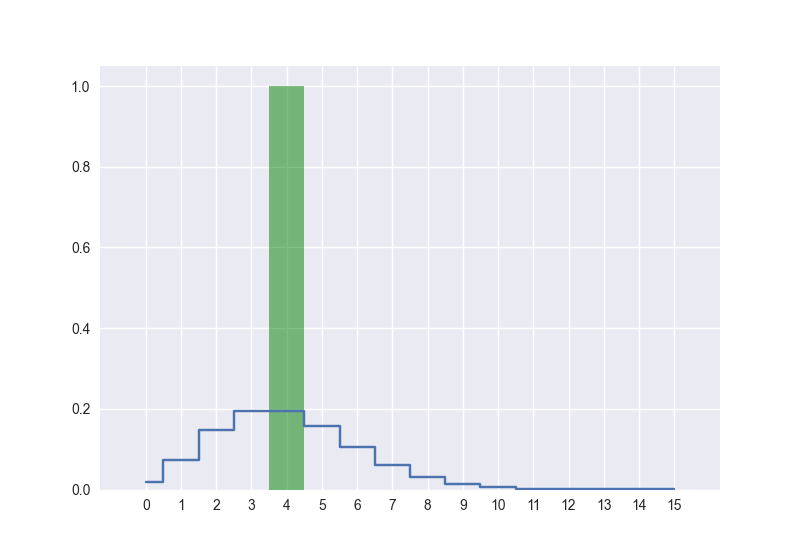

In [13]:
from matplotlib import animation

p = [ 4.0 / n for n in range(4, 100) ]
x = np.arange(0, 16)
fig, ax = plt.subplots()
ax.step(x, poisson.pmf(x, 4.0), where='mid')
bars = ax.bar(x, binom.pmf(x, n=4, p=p[0]), width=1, color='green', alpha=0.5)
ax.set_xticks(x)

def anim(i):
    for k, b in enumerate(bars):
        b.set_height(binom.pmf(k, n=i+4, p=p[i]))

interact(anim, i=widgets.IntSlider(min=0,max=len(p)-2));

# Zipf-Verteilung

Eine Zufallsvariable $X$ heißt **Zipf-verteilt** mit parameter $a>1$ falls $X(\Omega)=\mathbb{N}$ und ihre Wahrscheinlichkeitsfunction ist $$p_X(k)=\frac{k^{-a}}{\zeta(a)},\quad k\in\mathbb{N},$$
wobei $\zeta(a)\coloneqq\sum_{k\ge 1}k^{-a}$ bezeichnet die Riemannsche Zeta-Funktion.

In [11]:
def sample_zipf(a, N):
    X = zipf.rvs(a, size=N, random_state=rng)
    fig, ax = plt.subplots()
    x = np.arange(1, 16)
    fig, ax = plt.subplots()
    ax.step(x, zipf.pmf(x, a), where='mid')
    ax.hist(X, align='mid', bins=x-0.5, density=True)
    ax.set_xticks(x)
    plt.show()

In [12]:
interact_manual(sample_zipf, a=widgets.FloatSlider(min=1.1,max=10,value=1.0), N=widgets.IntSlider(min=1, max=10_000,value=10));

interactive(children=(FloatSlider(value=1.1, description='a', max=10.0, min=1.1), IntSlider(value=10, descript…